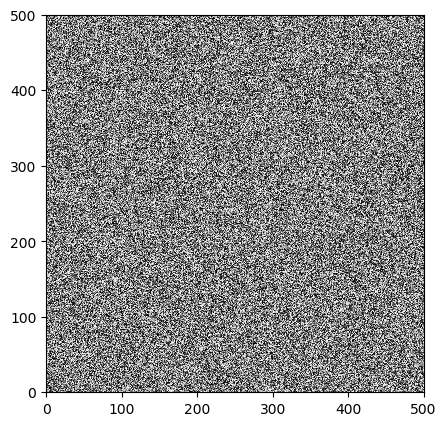

interactive(children=(FloatSlider(value=5.0, description='Wavelength', max=10.0, step=0.5), FloatSlider(value=…

<function __main__.update_plot(wavelength, separation, speed, pebbles)>

In [7]:
import matplotlib.pyplot as plt
from math import sqrt,sin,pi
import ipywidgets as widgets
from IPython.display import display
from IPython.display import HTML
import matplotlib.animation as animation
import numpy as np

side = 100.0
points = 500
frames=100

fig = plt.figure(figsize=[5,5], dpi=100) 
ax = plt.axes(xlim=(0, points), ylim=(0, points))
plt.gray()
xi = np.random.random((points,points))
im = plt.imshow(xi, origin="lower", extent=[0,points,0,points])

def init():
    xi = np.zeros((points,points),float)
    im.set_array(xi)
    return [im]

def update_plot(wavelength, separation, speed, pebbles):
    plt.rcParams['animation.embed_limit'] = 512 * 1024 * 1024 
    anim = animation.FuncAnimation(fig, animate, init_func=init, 
                               frames=100, fargs=(wavelength, separation,speed, pebbles), interval=40, blit=False)

    display(HTML(anim.to_jshtml()))

def normalize(minimum, maximum, value):
    return (value-minimum)/(maximum-minimum)
    
def animate(frame, wavelength ,speed, separation, pebbles):

    k = 2*pi/wavelength
    amp =1.0 #amplitude             
    spacing = side/points      
    minimum= -amp*pebbles
    maximum= amp*pebbles
    
    xi = np.zeros((points, points),float)
    
    x_list = []
    y_list = []
    
    for i in range(pebbles):
        x = (side - ((pebbles - 1) * separation)) / 2 + (separation * i)
        y = side / 2
        
        x_list.append(x)
        y_list.append(y)

    for i in range(points):
        y = spacing*i
        for j in range(points):
            x = spacing*j
            
            r = []
            for l in range(pebbles):
                x1 = x_list[l]
                y1 = y_list[l]
                
                r.append(sqrt((x-x1)**2+(y-y1)**2))
            
            total = 0
            for l in range(pebbles):
                total += amp * (sin(k*r[l] +(frame* speed)))
                
            xi[i,j] = normalize(minimum, maximum, total)

    im.set_array(xi)

    return [im]

separation= widgets.FloatSlider(min=5, max=50, value=25, step=5, descritption="Separation")
wavelength=widgets.FloatSlider(min=0, max=10, value=5 ,step=.5, description="Wavelength")
speed= widgets.FloatSlider(min=0,max=1,value=.25, step=.05, description="Speed")
pebbles=widgets.Dropdown(options=[1,2,3], value=1, description= '# of Pebbles:', disabled=False)


widgets.interact_manual(update_plot, separation=separation, wavelength=wavelength, speed=speed, pebbles=pebbles)